# Logic Gates Implementation using Neural Networks

We have used a two layered MLP to implement logic gates, For simplicity we have ignored the bias term and used sigmoid as activation in both layers.

In [1]:
import numpy as np
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def neural_network(X, y):
    learning_rate = 0.1
    W1 = np.random.rand(2, 2)
    W2 = np.random.rand(2, 1)

    for epoch in range(10000):  
        hidden = sigmoid(np.dot(X, W1))
        output = sigmoid(np.dot(hidden, W2))

        error = (y - output)

        delta2 = 2 * error * (output * (1 - output))
        delta1 = delta2.dot(W2.T) * (hidden * (1 - hidden))

        W2 += learning_rate * hidden.T.dot(delta2)
        W1 += learning_rate * X.T.dot(delta1)

    return {
        "output": np.round(output).flatten(),
        "hidden": hidden,
        "W1": W1, "W2": W2
    }

In [2]:
import matplotlib.pyplot as plt
def visualize(x, y, result, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.scatter(x=x[:, 0], y=x[:, 1], c=y, cmap='tab10')
    ax2.scatter(x=result['hidden'][:, 0], y=result['hidden'][:, 1], c=y, cmap='tab10')
    
    x1 = np.linspace(result['hidden'][:, 0].min(), result['hidden'][:, 0].max(), 1000)
    x2 = -1 * result['W2'][0] / result['W2'][1] * x1
    ax2.plot(x1, x2, '--r', label='decision_boundary')
    ax2.legend()
    
    fig.suptitle(title, size=18)
    ax1.set_title('Input Representation')
    ax2.set_title('Representation in Hidden Layer')
    plt.show()

In [3]:
def get_df(X, y, preds):
    df = pd.DataFrame(X, columns=['input1', 'input2'])
    df['actual'] = y
    df['predicted'] = preds
    return df.astype(int)

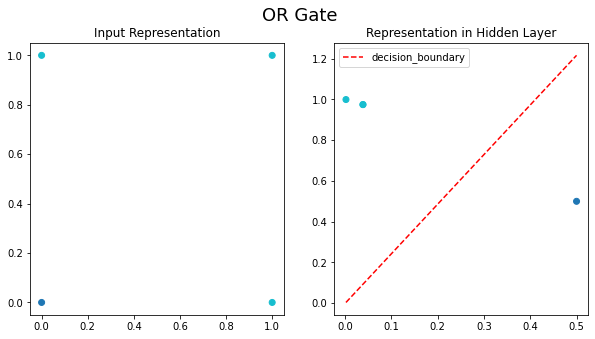

   input1  input2  actual  predicted
0       0       0       0          0
1       0       1       1          1
2       1       0       1          1
3       1       1       1          1


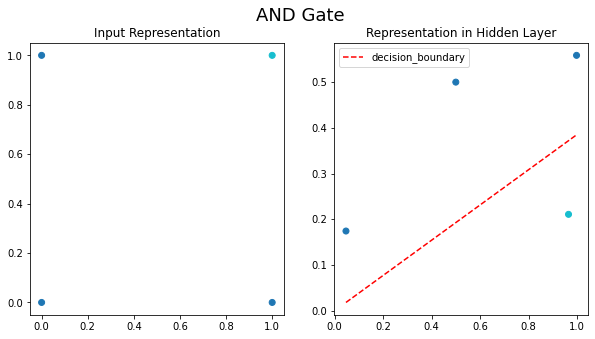

   input1  input2  actual  predicted
0       0       0       0          0
1       0       1       0          0
2       1       0       0          0
3       1       1       1          1


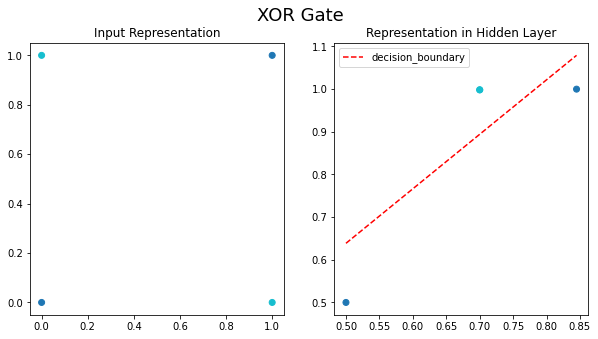

   input1  input2  actual  predicted
0       0       0       0          0
1       0       1       1          1
2       1       0       1          1
3       1       1       0          0


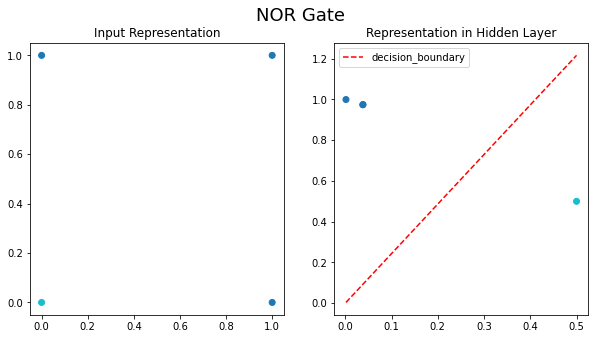

   input1  input2  actual  predicted
0       0       0       1          1
1       0       1       0          0
2       1       0       0          0
3       1       1       0          0


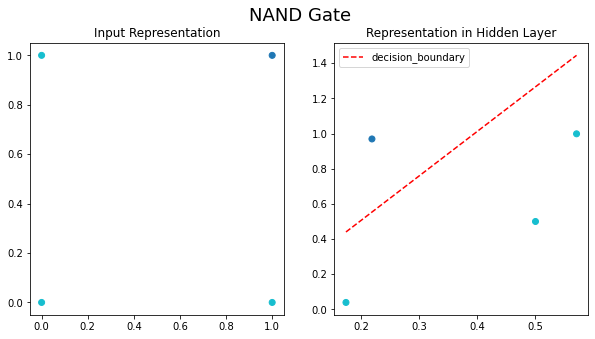

   input1  input2  actual  predicted
0       0       0       1          1
1       0       1       1          1
2       1       0       1          1
3       1       1       0          0


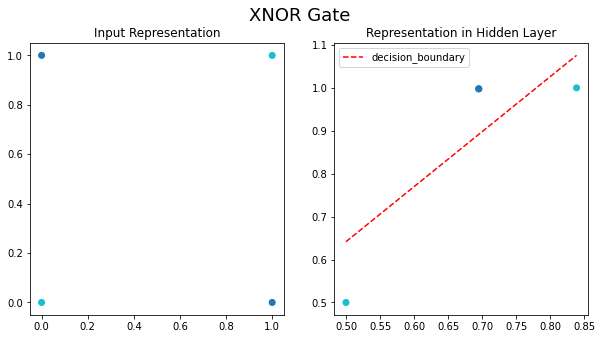

   input1  input2  actual  predicted
0       0       0       1          1
1       0       1       0          0
2       1       0       0          0
3       1       1       1          1


In [4]:
np.random.seed(47)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
GATES = {
    "OR": [0, 1, 1, 1],
    "AND": [0, 0, 0, 1],
    "XOR": [0, 1, 1, 0],
    "NOR": [1, 0, 0, 0],
    "NAND": [1, 1, 1, 0],
    "XNOR": [1, 0, 0, 1],
}

for gate in GATES:
    y = np.array([GATES[gate]]).T
    result = neural_network(X, y)
    visualize(X, y, result, f"{gate} Gate")
    print(get_df(X, GATES[gate], result['output']))
    